# Machine Learning Part 2
## Text Analysis
In this part, we use machine learning to get the most common symptoms and turn them into visualizations.

In [1]:
# Import dependencies
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import collections
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
# Get CSV obtained from database
vae_df = pd.read_json("vaers-final-2021.json")
vae_df = vae_df.drop(columns="_id")
vae_df.head()

,VAERS_ID,RECVDATE,STATE,STATE_NAME,LATITUDE,LONGITUDE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,...,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
0,916600,01/01/2021,TX,Texas,31.968599,-99.901813,33,33,,F,...,Dysphagia,23.1,Epiglottitis,23.1,0,0.0,0,0.0,0,0.0
1,916601,01/01/2021,CA,California,36.778261,-119.417932,73,73,,F,...,Anxiety,23.1,Dyspnoea,23.1,0,0.0,0,0.0,0,0.0
2,916602,01/01/2021,WA,Washington,47.751074,-120.740139,23,23,,F,...,Chest discomfort,23.1,Dysphagia,23.1,Pain in extremity,23.1,Visual impairment,23.1,0,0.0
3,916603,01/01/2021,WA,Washington,47.751074,-120.740139,58,58,,F,...,Dizziness,23.1,Fatigue,23.1,Mobility decreased,23.1,0,0.0,0,0.0
4,916604,01/01/2021,TX,Texas,31.968599,-99.901813,47,47,,F,...,Injection site erythema,23.1,Injection site pruritus,23.1,Injection site swelling,23.1,Injection site warmth,23.1,0,0.0


In [3]:
#Get column names
print(vae_df.columns)

Index(['VAERS_ID', 'RECVDATE', 'STATE', 'STATE_NAME', 'LATITUDE', 'LONGITUDE',
       'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX', 'RPT_DATE', 'SYMPTOM_TEXT',
       'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT', 'HOSPITAL', 'HOSPDAYS',
       'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE', 'ONSET_DATE', 'NUMDAYS',
       'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY', 'OTHER_MEDS', 'CUR_ILL', 'HISTORY',
       'PRIOR_VAX', 'SPLTTYPE', 'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT',
       'OFC_VISIT', 'ER_ED_VISIT', 'ALLERGIES', 'VAX_TYPE', 'VAX_MANU',
       'VAX_LOT', 'VAX_DOSE_SERIES', 'VAX_ROUTE', 'VAX_SITE', 'VAX_NAME',
       'SYMPTOM1', 'SYMPTOMVERSION1', 'SYMPTOM2', 'SYMPTOMVERSION2',
       'SYMPTOM3', 'SYMPTOMVERSION3', 'SYMPTOM4', 'SYMPTOMVERSION4',
       'SYMPTOM5', 'SYMPTOMVERSION5'],
      dtype='object')


In [4]:
# Get symptom text samples and merge into one
symptoms_df = pd.DataFrame(vae_df["SYMPTOM_TEXT"])
symptoms_df_sample = symptoms_df.sample(500)
symptoms_sample = ' '.join(symptoms_df_sample['SYMPTOM_TEXT'].tolist())

In [5]:
# Tokenize words and remove stop words
text = symptoms_sample
text_tokens = word_tokenize(text)
new_words= [word for word in text_tokens if word.isalnum()]
tokens_without_sw = [word for word in new_words if not word in stopwords.words()]
len(tokens_without_sw)

27350

In [6]:
# Get most common words
counter = collections.Counter(tokens_without_sw)

In [7]:
# Print results
print(counter.most_common(100))

[('patient', 654), ('The', 454), ('I', 327), ('dose', 310), ('vaccine', 309), ('received', 243), ('arm', 217), ('pain', 197), ('reported', 195), ('events', 186), ('report', 156), ('vaccination', 144), ('first', 143), ('This', 142), ('unknown', 141), ('unspecified', 139), ('Patient', 134), ('left', 132), ('history', 130), ('She', 130), ('number', 125), ('injection', 125), ('day', 123), ('days', 123), ('A', 116), ('On', 116), ('hours', 116), ('headache', 114), ('spontaneous', 111), ('felt', 109), ('date', 103), ('BNT162B2', 103), ('included', 102), ('like', 101), ('No', 101), ('experienced', 100), ('medications', 99), ('outcome', 96), ('site', 96), ('administration', 94), ('chills', 91), ('VACCINE', 89), ('single', 88), ('event', 86), ('lot', 83), ('via', 82), ('symptoms', 82), ('female', 81), ('contactable', 80), ('still', 80), ('fever', 79), ('started', 78), ('fatigue', 77), ('nausea', 76), ('route', 75), ('medical', 73), ('provided', 72), ('information', 71), ('back', 70), ('chest', 6

In [8]:
# Get only nouns
asdfs = pd.DataFrame(vae_df["SYMPTOM_TEXT"])
asdf = asdfs.sample(500)
asdflist = asdf["SYMPTOM_TEXT"].to_list()
nouns = []
for word,pos in nltk.pos_tag(nltk.word_tokenize(str(asdflist))):
    if (pos == 'NN' or pos == 'NNS'):
        nouns.append(word)
nouns

['[',
 'heart',
 'min',
 'kind',
 'whoozy',
 'office',
 'headache',
 'hour',
 'Took',
 'mg',
 'okay',
 'arm',
 'pm',
 'night',
 'knees',
 'chills',
 'minutes',
 'temp',
 'tylenol',
 'hour',
 'chills',
 'pm',
 'temp',
 'pharmacy',
 'version',
 'night',
 'chills',
 'temp',
 'side',
 'bed',
 'tylenol',
 'mg',
 'bathroom',
 'arm',
 'wall',
 'wall',
 'bedroom',
 'doorknob',
 'bathroom',
 'toilet',
 'hours',
 'chills',
 'day',
 'appetite',
 'day',
 'fever',
 'sick',
 'appetite',
 'woozy',
 'inside',
 'days',
 'stats',
 'liters',
 'liters',
 'pulmonologist',
 'questions',
 'injection',
 'site',
 'day',
 'bandage',
 'insertion',
 'site',
 'redness',
 'reports',
 'days',
 'vaccine',
 'pain',
 'soreness',
 'arm',
 'myalgias',
 'body',
 'weakness',
 'sx',
 'gel',
 'night',
 'night',
 'shift',
 'nurse',
 'night',
 'arm',
 'arm',
 'shot',
 'end',
 'night',
 'arm',
 'days',
 'period',
 'night',
 'morning',
 'hours',
 'vaccine',
 'alarm',
 'patient\\',
 'bedside',
 'co-vid',
 'hour',
 'day',
 'slept'

In [9]:
# Frequency grouping of list elements
res = []
temp = dict()
for ele in nouns:
    if ele in temp:
        temp[ele] = temp[ele] + 1 
    else : 
        temp[ele] = 1
for key in temp:
    res.append((key, temp[key]))
dff = pd.DataFrame(res)
dff = dff.sort_values(by=1,ascending=False)
dff = dff.rename(columns={0: "Word", 1: "Frequency"})
dff = dff.reset_index(drop=True)
dff.head()

,Word,Frequency
0,patient,595
1,vaccine,319
2,arm,275
3,dose,249
4,events,179


In [10]:
# Delete irrelevant words
irrwords = ["report","minutes","minute","hours","hour","days","day","weeks","week","patient","number","site","dose",
           "first", "second","administration","event","events", "history","injection","date","time","dates","outcome",
           "meters","inches","years","data","lab","attempts","staff"]
finaldf = dff
for word in irrwords:
    finaldf = finaldf[finaldf.Word != word]
finaldf.head()

,Word,Frequency
1,vaccine,319
2,arm,275
5,pain,176
7,vaccination,151
15,symptoms,113


In [11]:
# Get dictionary
dct = {}
for a, x in finaldf.values:
    dct[a] = x
dct

{'vaccine': 319,
 'arm': 275,
 'pain': 176,
 'vaccination': 151,
 'symptoms': 113,
 'headache': 107,
 'medications': 104,
 'chills': 92,
 'fatigue': 89,
 'fever': 88,
 'body': 86,
 'aches': 75,
 'route': 71,
 'female': 67,
 'nausea': 67,
 'consumer': 63,
 'side': 61,
 'immunization': 59,
 'reaction': 58,
 'heart': 54,
 'morning': 54,
 'rash': 54,
 'blood': 53,
 'information': 53,
 'shot': 51,
 'treatment': 49,
 'throat': 48,
 'night': 48,
 'lot': 48,
 'area': 47,
 'test': 44,
 'Patient': 43,
 'pressure': 43,
 'work': 41,
 'lot/batch': 40,
 'Comments': 40,
 'Information': 40,
 'dizziness': 39,
 'response': 39,
 'redness': 37,
 'infection': 37,
 'part': 37,
 'immunisation': 37,
 'medication': 36,
 'rate': 36,
 'safety': 35,
 'doctor': 35,
 'care': 35,
 'allergies': 34,
 'home': 34,
 'age': 34,
 'hospital': 34,
 'weakness': 33,
 'reporter': 32,
 'face': 32,
 'breath': 32,
 'review': 32,
 'left': 31,
 'vaccines': 31,
 'product': 30,
 'head': 30,
 'emergency': 30,
 'muscle': 29,
 'doses': 2

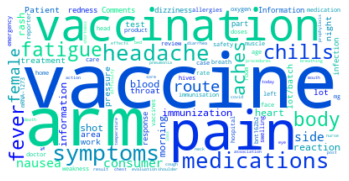

In [12]:
# Create word cloud
wordcloud = WordCloud(background_color="white", max_words=100, colormap="winter")
wordcloud.generate_from_frequencies(frequencies=dct)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('wordcloudsymptoms.png')
plt.show()